# Spatial Sampling Raster Data

In [4]:
# Load relevant R packages
inLibraries = list('repr','rgdal','sp','rgeos','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

The input for this exercise is a raster file representing landuse and landcover for Taney County, MO (taneycomo/lulc6.tif). Read the raster file, Output the raster dataset characteristics to the screen to examine its extent, spatial resolution, coordinate reference system, and range of values. Next, plot the raster values. Note how the forecasted probability of precipitation varies throughout the region.

In [5]:
raster <- raster("datasets/taneycomo/lulc6.tif")

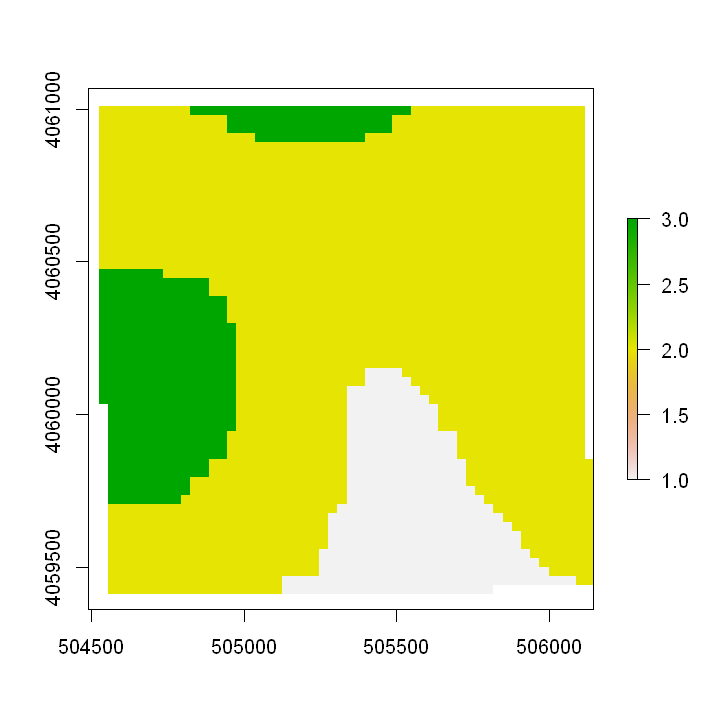

In [6]:
plot(raster)

In [7]:
raster

class       : RasterLayer 
dimensions  : 56, 55, 3080  (nrow, ncol, ncell)
resolution  : 30.07721, 29.65358  (x, y)
extent      : 504490.6, 506144.9, 4059384, 4061045  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 
data source : C:\Users\Jacky Zhao\Desktop\repos\R-Data\datasets\taneycomo\lulc6.tif 
names       : lulc6 
values      : 1, 3  (min, max)


Generate 100 random samples (n=100) sucessively 10 times (m=10). Tally the number of times that each cell is sampled in the 10 trials. Plot a raster that can be used to visualize the number of times each cell is sampled.

In [8]:
#### JACKY: 

# This was a little tricky...
# 1) Generate 100 sample points 10 times. Put them all into allData 
# 2) Do a count on allData based on cell, row, col, x, and y
# 3) Convert the frequency df into a spatial points dataframe
# 4) Plot it on top of the raster and display the counts as datapoint symbols.

In [9]:
n <- 100
m <- 10

allData <- data.frame()

for (i in 1:m){
    
    sr <- sampleRandom(raster, n, 
                              rowcol = TRUE, 
                              cells = TRUE, 
                              sp = TRUE)
    
    sr <- data.frame(sr)    
    allData <- rbind(allData, sr)
}

rownames(allData) <- NULL
allData$optional <- NULL
allData$lulc6 <- NULL

In [10]:
head(allData, 3)

cell,row,col,x,y
2187,40,42,505738.8,4059873
2721,50,26,505257.6,4059577
693,13,33,505468.1,4060674


In [11]:
dim(allData)

[1] 1000    5

In [12]:
library(dplyr)

samp.counts <- allData %>%
    group_by(cell, row, col, x, y) %>%
    summarize(freq = n()) %>%
    arrange(desc(freq))

Warning message:
"package 'dplyr' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:raster':

    intersect, select, union

The following objects are masked from 'package:rgeos':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
head(samp.counts)

cell,row,col,x,y,freq
2279,42,24,505197.5,4059814,4
3010,55,40,505678.7,4059428,4
497,10,2,504535.8,4060763,3
877,16,52,506039.6,4060585,3
1132,21,32,505438.1,4060437,3
1413,26,38,505618.5,4060288,3


In [14]:
ptcoords <- cbind(as.numeric(samp.counts$x), as.numeric(samp.counts$y))

head(ptcoords)

505197.5,4059814
505678.7,4059428
504535.8,4060763
506039.6,4060585
505438.1,4060437
505618.5,4060288


In [15]:
df <- samp.counts[, c("cell", "row", "col", "freq")]

head(df)

cell,row,col,freq
2279,42,24,4
3010,55,40,4
497,10,2,3
877,16,52,3
1132,21,32,3
1413,26,38,3


In [16]:
spts <- SpatialPointsDataFrame(ptcoords, data = df)

spts[1:5, ]

          coordinates cell row col freq
1 (505197.5, 4059814) 2279  42  24    4
2 (505678.7, 4059428) 3010  55  40    4
3 (504535.8, 4060763)  497  10   2    3
4 (506039.6, 4060585)  877  16  52    3
5 (505438.1, 4060437) 1132  21  32    3

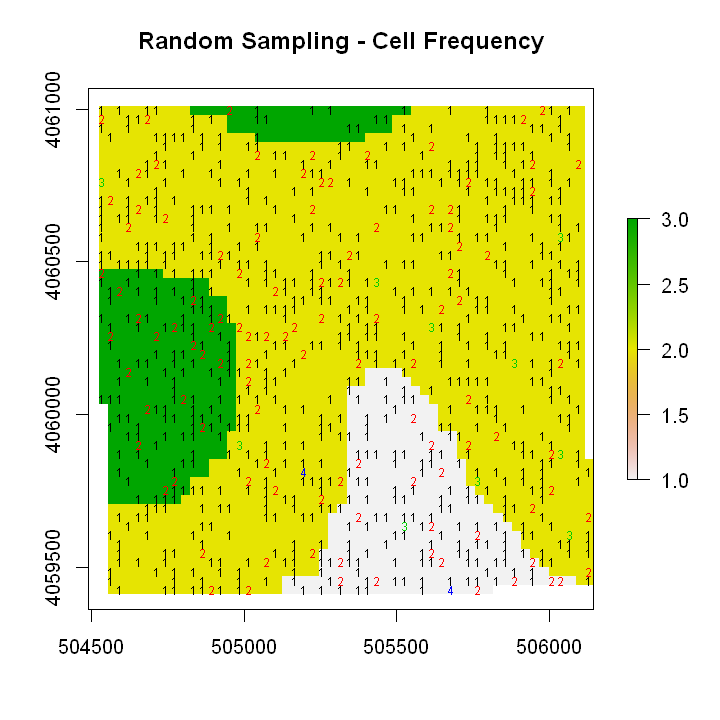

In [17]:
plot(raster, main = "Random Sampling - Cell Frequency")
plot(spts, add = TRUE, pch = as.character(spts$freq), col = as.character(spts$freq), cex = 0.6)

The land use land cover data represents the category of land use/land cover associated with each raster cell. That is the numbers are categorical. Given this, use these categories as strata from which to sample. For each strata, randomly sample 30 cells (n=30).  Plot a raster that can be used to visualize the cells sampled from each category.

In [18]:
raster

class       : RasterLayer 
dimensions  : 56, 55, 3080  (nrow, ncol, ncell)
resolution  : 30.07721, 29.65358  (x, y)
extent      : 504490.6, 506144.9, 4059384, 4061045  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 
data source : C:\Users\Jacky Zhao\Desktop\repos\R-Data\datasets\taneycomo\lulc6.tif 
names       : lulc6 
values      : 1, 3  (min, max)


In [19]:
n <- 30

samp.stra <- sampleStratified(raster, n, xy = TRUE, sp = TRUE)

head(samp.stra)

cell,x,y,lulc6
2072,505588.5,4059933,1
2400,505528.3,4059755,1
2119,505347.8,4059903,1
1736,505408.0,4060110,1
1846,505408.0,4060051,1
2349,505648.6,4059784,1


In [20]:
length(samp.stra)

[1] 90

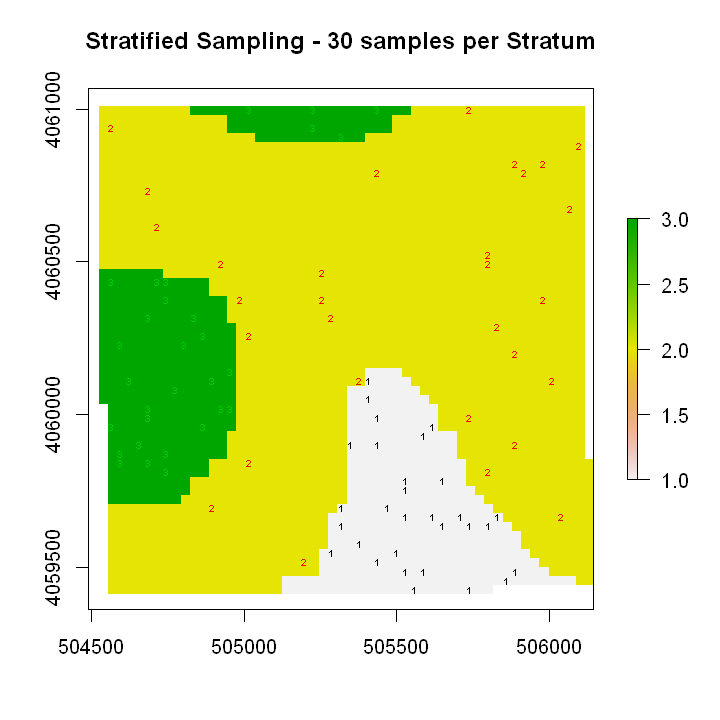

In [21]:
plot(raster, main = "Stratified Sampling - 30 samples per Stratum")

plot(samp.stra, 
     axes = FALSE, 
     pch = as.character(samp.stra$lulc6), 
     col = as.character(samp.stra$lulc6),
     add = TRUE, cex = 0.5)

Generate 100 stratified samples (n=100) sucessively 10 times (m=10). Tally the number of times that each cell is sampled in the 10 trials. Plot 3 rasters - one raster for each land use/ land cover category that summarizes the number of times that a cell from that category was sampled.

In [22]:
n <- 100
m <- 10

allData <- data.frame()

for (i in 1:m){
    ss <- sampleStratified(raster, n, sp = TRUE)
    ss <- data.frame(ss)
    allData <- rbind(allData, ss)    
}

allData$optional <- NULL
head(allData)

cell,lulc6,x,y
2723,1,505317.8,4059577
2959,1,505799.0,4059458
2617,1,505438.1,4059636
2893,1,505468.1,4059488
2069,1,505498.2,4059933
1962,1,505588.5,4059992


In [23]:
counts <- allData %>%
    group_by(cell, x, y, lulc6) %>%
    summarize(freq = n()) %>%
    arrange(desc(freq))

head(counts)

cell,x,y,lulc6,freq
1218,504716.2,4060377,3,8
2238,505618.5,4059844,1,7
2850,505829.1,4059517,1,7
1222,504836.5,4060377,3,6
1333,504866.6,4060318,3,6
1543,504565.8,4060199,3,6


In [24]:
samp1 <- counts[counts$lulc6 == 1, ]
samp2 <- counts[counts$lulc6 == 2, ]
samp3 <- counts[counts$lulc6 == 3, ]

In [25]:
head(samp1, 3)

cell,x,y,lulc6,freq
2238,505618.5,4059844,1,7
2850,505829.1,4059517,1,7
1796,505558.4,4060081,1,6


In [26]:
head(samp2, 3)

cell,x,y,lulc6,freq
1209,506099.8,4060407,2,4
1578,505618.5,4060199,2,4
2365,506129.8,4059784,2,4


In [27]:
head(samp3, 3)

cell,x,y,lulc6,freq
1218,504716.2,4060377,3,8
1222,504836.5,4060377,3,6
1333,504866.6,4060318,3,6


In [28]:
pt1 <- cbind(as.numeric(samp1$x), as.numeric(samp1$y))
pt2 <- cbind(as.numeric(samp2$x), as.numeric(samp2$y))
pt3 <- cbind(as.numeric(samp3$x), as.numeric(samp3$y))

In [29]:
df1 <- samp1[, c("cell", "freq")]
df2 <- samp2[, c("cell", "freq")]
df3 <- samp3[, c("cell", "freq")]

In [30]:
sp1 <- SpatialPointsDataFrame(pt1, data = df1)
sp2 <- SpatialPointsDataFrame(pt2, data = df2)
sp3 <- SpatialPointsDataFrame(pt3, data = df3)

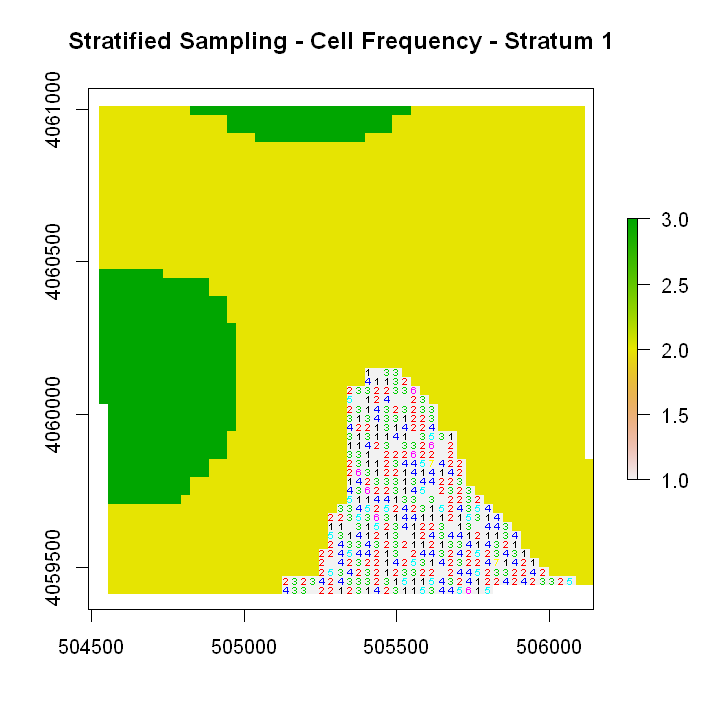

In [31]:
plot(raster, main = "Stratified Sampling - Cell Frequency - Stratum 1")
plot(sp1, add = TRUE, pch = as.character(sp1$freq), col = as.character(sp1$freq), cex = 0.5)

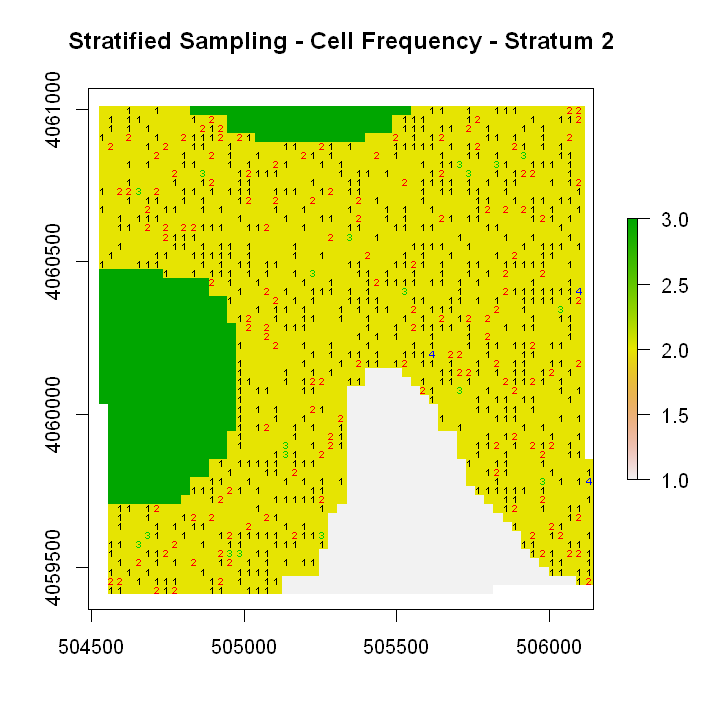

In [32]:
plot(raster, main = "Stratified Sampling - Cell Frequency - Stratum 2")
plot(sp2, add = TRUE, pch = as.character(sp2$freq), col = as.character(sp2$freq), cex = 0.5)

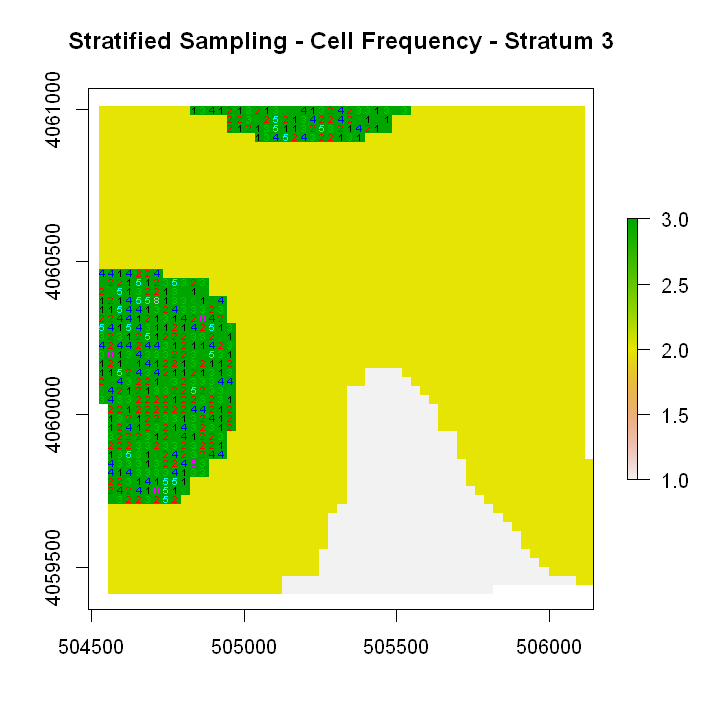

In [33]:
plot(raster, main = "Stratified Sampling - Cell Frequency - Stratum 3")
plot(sp3, add = TRUE, pch = as.character(sp3$freq), col = as.character(sp3$freq), cex = 0.5)

Conduct a regular sample of 100 cells (n=100). Plot a raster that can be used to visualize the cells sampled from each land use land cover category.

In [34]:
n <- 100

samp.reg <- sampleRegular(raster, n, cells = TRUE, sp = TRUE)

In [35]:
head(samp.reg)

cell,lulc6
113,2
119,2
125,2
131,3
138,3
144,2


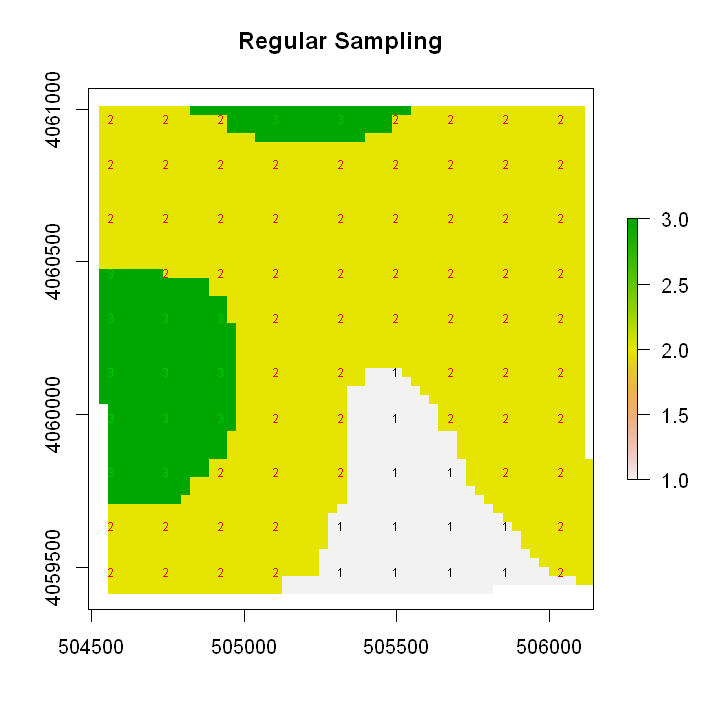

In [36]:
plot(raster, main = "Regular Sampling")
plot(samp.reg, add = TRUE, col = samp.reg$lulc6, pch = as.character(samp.reg$lulc6), cex = 0.6)